In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("../src/XTern 2024 Artificial Intelegence Data Set.xlsx")

data.head()



,Year,Major,University,Time,Order
0,Year 1,Finance,Ball State University,10,Breaded Pork Tenderloin Sandwich
1,Year 1,Astronomy,University of Evansville,15,Sweet Potato Fries
2,Year 1,Mathematics,University of Evansville,15,Sweet Potato Fries
3,Year 1,Mathematics,University of Notre Dame,15,Ultimate Grilled Cheese Sandwich (with bacon a...
4,Year 1,Business Administration,University of Notre Dame,15,Ultimate Grilled Cheese Sandwich (with bacon a...


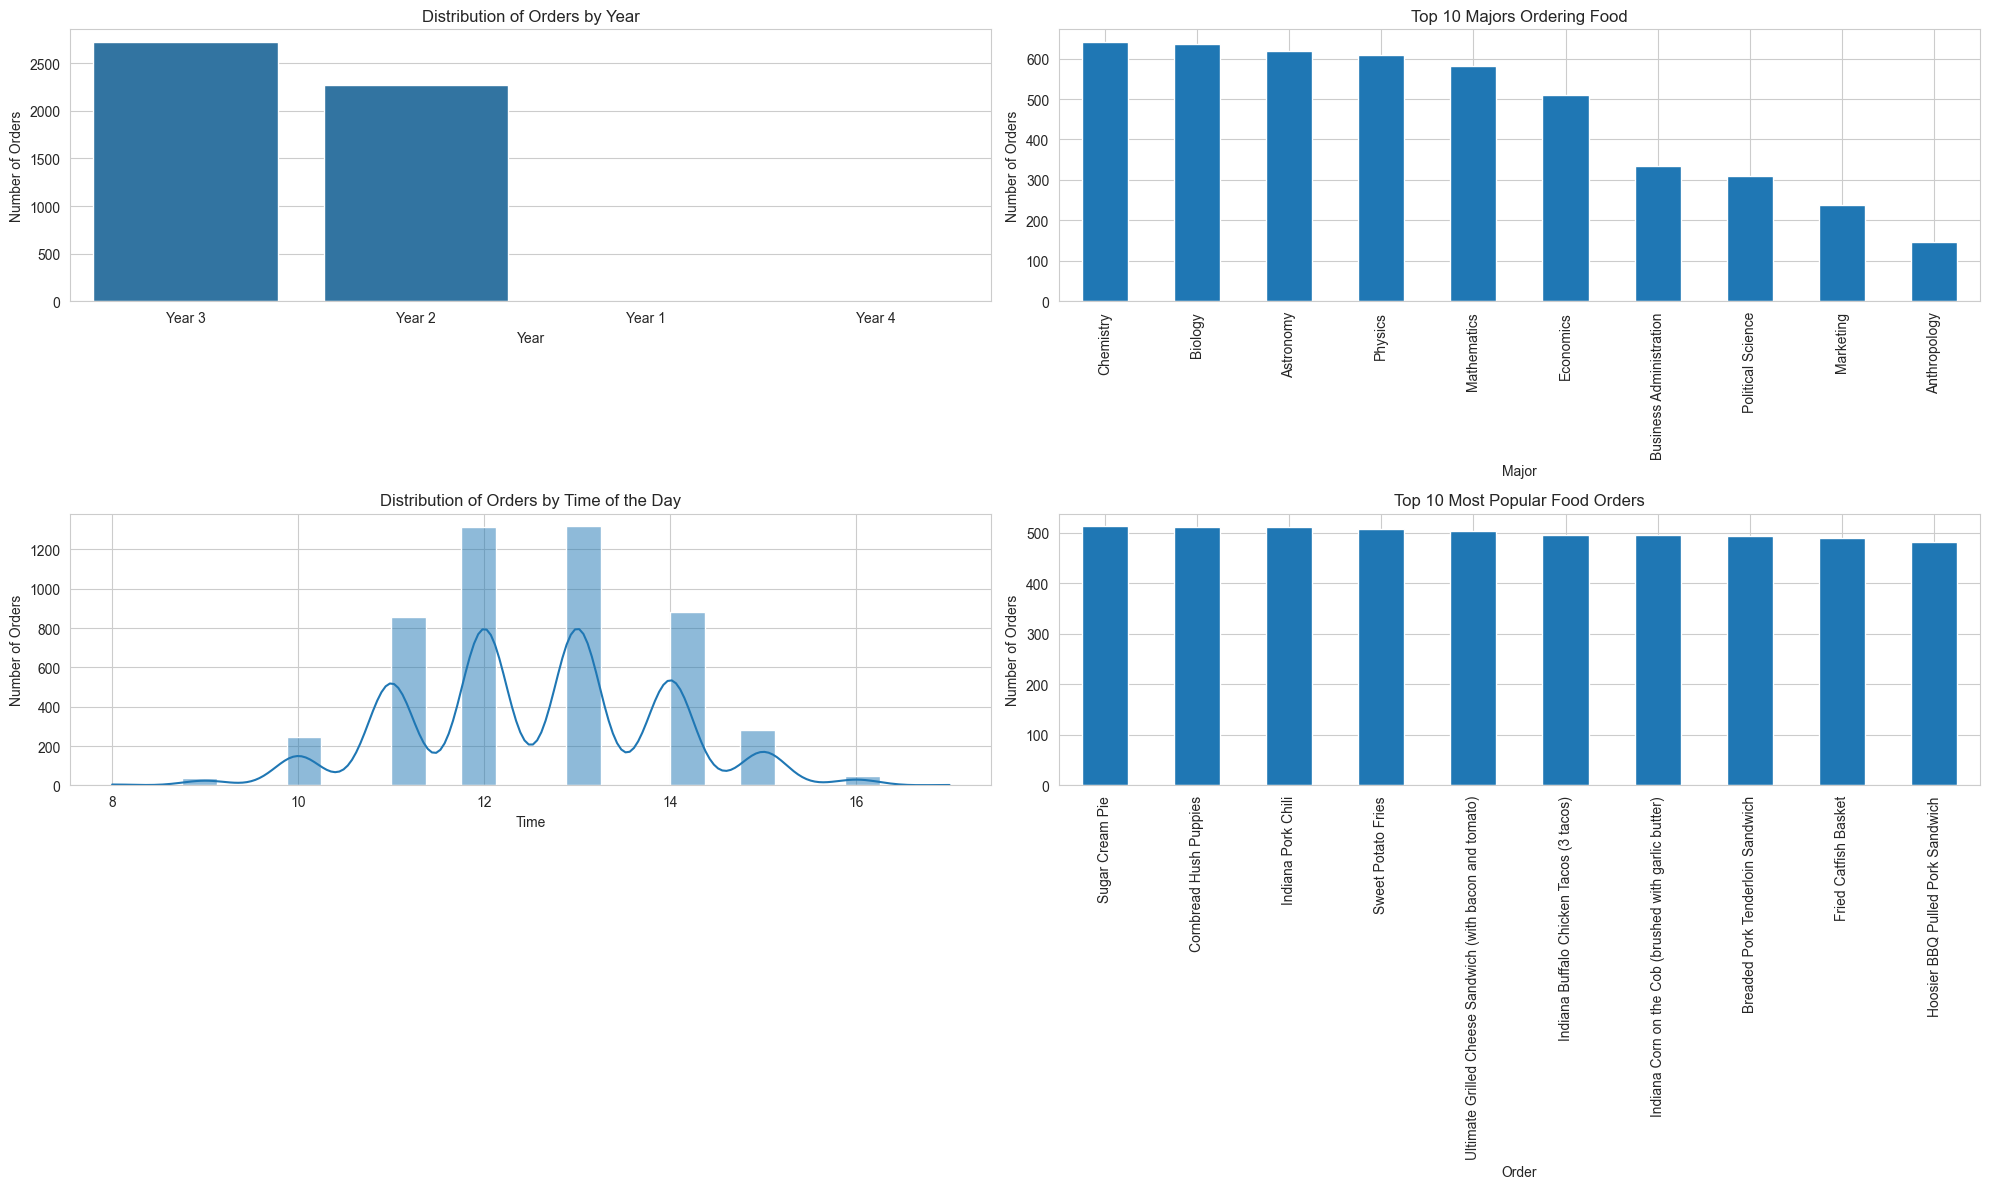

In [28]:
# Set the style for the plots
sns.set_style("whitegrid")

# Set up the figure and axes
fig, ax = plt.subplots(2, 2, figsize=(20, 12))

# 1. Distribution of Orders by Year
sns.countplot(data=data, x='Year', order=data['Year'].value_counts().index, ax=ax[0, 0])
ax[0, 0].set_title("Distribution of Orders by Year")
ax[0, 0].set_ylabel("Number of Orders")

# 2. Top 10 Majors ordering food
data['Major'].value_counts().head(10).plot(kind='bar', ax=ax[0, 1])
ax[0, 1].set_title("Top 10 Majors Ordering Food")
ax[0, 1].set_ylabel("Number of Orders")

# 3. Distribution of Orders by Time of the Day
sns.histplot(data=data, x='Time', bins=24, kde=True, ax=ax[1, 0])
ax[1, 0].set_title("Distribution of Orders by Time of the Day")
ax[1, 0].set_ylabel("Number of Orders")

# 4. Top 10 Most Popular Food Orders
data['Order'].value_counts().head(10).plot(kind='bar', ax=ax[1, 1])
ax[1, 1].set_title("Top 10 Most Popular Food Orders")
ax[1, 1].set_ylabel("Number of Orders")

# Adjust layout
plt.tight_layout()
plt.show()

In [39]:
print('''
Distribution of Orders by Year:
Most of the orders come from students in their second and third year, while we don't have any data on freshman and senior students.

Top 10 Majors Ordering Food:
The most frequent majors that order food are Chemistry, Biology, Astronomy, Physics, and a couple of other majors, while majors like Anthropology and Marketing were among the least frequent.

Distribution of Orders by Time of the Day:
We can see that the busiest time for our FoodX trucks are between 11 and 13.

Food Orders:
The types of food ordered are evenly distributed, all averaging 500 orders each.

Potential Business Use Cases based on the data:
Targeted Marketing: Knowing that some majors are more common customers than other majors, we can target our efforts on the less common groups of people.
Optimizing Inventory: By analyzing the most popular food items, the inventory can be optimized to ensure that ingredients for these items are always in stock.

Operational Efficiency: Understanding the peak order times can help in staff allocation and ensuring that the food truck is adequately staffed during these times.

''')



Distribution of Orders by Year:
Most of the orders come from students in their second and third year, while we don't have any data on freshman and senior students.

Top 10 Majors Ordering Food:
The most frequent majors that order food are Chemistry, Biology, Astronomy, Physics, and a couple of other majors, while majors like Anthropology and Marketing were among the least frequent.

Distribution of Orders by Time of the Day:
We can see that the busiest time for our FoodX trucks are between 11 and 13.

Food Orders:
The types of food ordered are evenly distributed, all averaging 500 orders each.

Potential Business Use Cases based on the data:
Targeted Marketing: Knowing that some majors are more common customers than other majors, we can target our efforts on the less common groups of people. For example, we can have discouts for friends with STEM and non-STEM majors.

Optimizing Inventory: By analyzing the most popular food items, the inventory can be optimized to ensure that ingredie

In [42]:
print('''
1. Ethical Implications:
    a. Privacy Concerns:
    Collecting data about students, their majors, and universities might raise privacy concerns. It's essential to ensure that this data is anonymized and can't be traced back to individual students.
    
    b. Bias and Representation:
    If the data isn't representative of all students or only represents a particular group, which is the case in data, it can lead to biased recommendations and predictions. This might alienate certain groups of students. Currently, we only have data from 2nd and 3rd year students.
    
    c. Informed Consent:
    Students should be aware that their data is being collected and used for predictions. They should provide explicit consent for the same.


2. Business Outcome Implications:
    a. Data Accuracy and Integrity:
    Incorrect or outdated data can lead to poor predictions, which might affect the promotional offer (10% discount for wrong guesses). This can have financial implications.
    
    b. Trust and Reputation:
    Mismanagement or misuse of data can lead to loss of trust among the users. A robust data protection mechanism is crucial for maintaining the brand's reputation.
    
    c. Competitive Advantage:
    A well-implemented AI system that accurately predicts orders can give a competitive edge and improve user experience, leading to higher customer retention. For this reason, We are trying to come up with a prediction model.



3. Technical Implications:
    a. Data Storage and Security:
    Storing large amounts of data requires robust databases. Ensuring data security to prevent breaches is of utmost importance.
    
    b. Scalability:
    As the number of users grows, the system should be scalable to handle the increasing volume of data and prediction requests.
    
    c. Model Maintenance:
    The prediction model might need periodic retraining as new data comes in. There should be a mechanism to update the model without causing disruptions.
    
    d. Handling Biases:
    The technical team should be aware of potential biases in the data and should employ techniques to mitigate them during model training.
    
    e. Infrastructure Costs:
    Implementing and maintaining a robust AI system has associated infrastructure costs. These include servers, databases, and other resources.

''')


1. Ethical Implications:
    a. Privacy Concerns:
    
    b. Bias and Representation:
    If the data isn't representative of all students or only represents a particular group, which is the case in data, it can lead to biased recommendations and predictions. This might alienate certain groups of students. Currently, we only have data from 2nd and 3rd year students.
    
    c. Informed Consent:
    Students should be aware that their data is being collected and used for predictions. They should provide explicit consent for the same.


2. Business Outcome Implications:
    a. Data Accuracy and Integrity:
    Incorrect or outdated data can lead to poor predictions, which might affect the promotional offer (10% discount for wrong guesses). This can have financial implications.
    
    b. Trust and Reputation:
    Mismanagement or misuse of data can lead to loss of trust among the users. A robust data protection mechanism is crucial for maintaining the brand's reputation.
    
    c. C

In [43]:
print('''
Given the nature of the data, we'll be predicting the 'Order' based on features like 'Year', 'Major', 'University', and 'Time'. This is a multi-class classification problem since there are multiple possible food orders.

Here's our plan:

Data Preprocessing:
    Convert categorical variables (like 'Year', 'Major', and 'University') into numerical format using encoding techniques.
    Split the data into training(4/5) and testing sets(1/5).

Model Selection:
        We'll start with a simple model like the RandomForestClassifier from sklearn. This model can handle multi-class classification, so I think it provides a good starting point.

Training the Model:
    Train the model using the training data.
    
Model Evaluation:
    Evaluate the model's performance on the test data using appropriate metrics.
    
Model Saving:
    If satisfied with the model's performance, we'll pickle the model for future use.''')


Given the nature of the data, we'll be predicting the 'Order' based on features like 'Year', 'Major', 'University', and 'Time'. This is a multi-class classification problem since there are multiple possible food orders.

Here's our plan:

Data Preprocessing:
    Convert categorical variables (like 'Year', 'Major', and 'University') into numerical format using encoding techniques.
    Split the data into training and testing sets.

Model Selection:
        We'll start with a simple model like the RandomForestClassifier from sklearn. This model can handle multi-class classification, so I think it provides a good starting point.

Training the Model:
    Train the model using the training data.
    
Model Evaluation:
    Evaluate the model's performance on the test data using appropriate metrics.
    
Model Saving:
If satisfied with the model's performance, we'll pickle the model for future use.


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Label Encoding for categorical variables
label_encoders = {}
for column in ['Year', 'Major', 'University', 'Order']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Splitting data into training and testing sets
X = data.drop('Order', axis=1)
y = data['Order']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape



((4000, 4), (1000, 4))

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Label Encoding for categorical variables
label_encoders = {}
for column in ['Year', 'Major', 'University', 'Order']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Splitting data into training and testing sets
X = data.drop('Order', axis=1)
y = data['Order']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((4000, 4), (1000, 4))

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)




# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoders['Order'].classes_)

accuracy, classification_rep


TypeError: object of type 'numpy.int64' has no len()